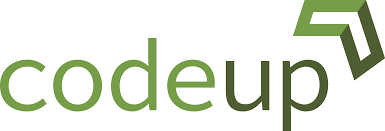

# <h><i><u><font size="20">Project-4 TITLE</font></u></i></h>

# Project Overview:
This is an individual project to demonstrate my ability to source and acquire data independently outside the classroom environment. This individual project is an opportunity for me to showcase my ability to plan and execute a project that follows the full Data Science pipeline from start to finish with a presentable deliverable that has meaning and value in its content. I have chosen to use data from the [World Health Organization (WHO)](https://www.who.int/) because it is trustworthy and contains global input that spans many years.

# Goals: 
* Predict property tax assessed values of Single Family Properties
* Outperform existing logerror model
* Recommend improvements for a more accurate model
* Define relevant fips codes for our data

# Reproduction of this Data:
* Can be accomplished using a local ```env.py``` containing ```user, password, host``` information for access to the Codeup SQL database server.
* All other step by step instructions can be found by reading the below Jupyter Notebook files located in my [proj-2_zillow](https://github.com/QMCBT-JustinEvans/project-2_zillow.git) github repository.
    * 01_wrangle
    * 02_explore
    * 03_model
* Data for this project was acquired from the [World Health Organization (WHO)](https://www.who.int/) using the the [Global Health Obsevatory (GHO)](https://www.who.int/data/gho) data webservice, [Athena](https://www.who.int/data/gho/info/athena-api-examples).
    * World Health Organization (WHO) - [https://www.who.int/](https://www.who.int/)
    * Global Health Obsevatory (GHO) - [https://www.who.int/data/gho](https://www.who.int/data/gho)
    * Athena data webservice - [https://www.who.int/data/gho/info/athena-api-examples](https://www.who.int/data/gho/info/athena-api-examples)

# Imports
* These are the imports required to run this notebook

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000 # assists with processor speed

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.neighbors import KNeighborsClassifier

# import helper files from local environment
from env import user, password, host
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare
import QMCBT_03_explore as explore
import QMCBT_04_model as model
import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# allows import reload without needing to clear kernel and rerun
from importlib import reload
# reload(packagename) 

import warnings
warnings.filterwarnings("ignore")

**CUSTOM EXPLORATION FUNCTIONS
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES

**USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.describe().T
DFNAME.columns.to_list()
DFNAME.COLUMNNAME.value_counts(dropna=False)
DFNAME.dtypes
DFNAME.select_dtypes(include='object').columns
DFNAME.select_dtypes(include='float').columns
pd.crosstab(DFNAME.COLUMN-1, DFNAME.COLUMN-2)


In [7]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# Acquire
* Write the code to go get your data

<div class="alert alert-success">

# Explore
* Explore the data to get to know the elements and stats
* Create your Data Dictionary in this phase
* Identify your Prepare To-Do list in this phase
* Visualize your data in this phase

<div class="alert alert-success">

# Prepare
* Write the code to fix and clean the data

<div class="alert alert-info">

## Prepare Actions:
* **WHITESPACE:** Removed 52,441 Whitespace characters.
* **REFORMAT:** Reformatted 13 columns containing 596,382 NaN entries to 0.
* **CONVERT dtypes:** Convert dtypes to accurately reflect data contained within Feature.
* **FEATURE ENGINEER:** Use Yearbuilt to create Age Feature, Drop yearbuilt for redundancy; create Feature to show ratio of Bathrooms to Bedrooms.
* **GHO CODE CONVERSION:** Use fips master list to convert fips to county and state, Drop state for redundancy.
* **PIVOT:** Pivot the resulting county column from fips conversion to 3 catagorical features. 
* **DROP:** Dropped 27 Columns unecessary to data prediction (ie.. index and redundant features).
* **REPLACE:** Replaced conditional values in 2 columns to transform into categorical features.
* **RENAME:** Columns for Human readability.    
* **REORDER:** Rearange order of columns for human readability.   
* **DROP 2:** Drop Location Reference Columns unsuitable for use with ML without categorical translation.
* **CACHE:** Write cleaned DataFrame into a new csv file ('zillow_2017_cleaned.csv').  
* **ENCODE.map:** No encoding required.
* **MELT:** No melts needed.

* **IMPUTE:**
* **DROP encoded.map columns:**
* **DROP pivot columns:**
* **RENAME encoded.map columns to remove "_encoded":**

<div class="alert alert-success">

# Data Dictionary

| Feature | Definition |dtype|
|:--------|:-----------|:----|
|         |            |     |
|         |            |     |
|         |            |     |
|         |            |     |
|         |            |     |
|         |            |     |
|         |            |     |

<div class="alert alert-success">

# Data Dictionary
* Documentation is hyperlinked

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|WHOSIS_000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65)|Life expectancy at birth (years)| 
|WHOSIS_000002|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)|Healthy life expectancy (HALE) at birth (years)| 
|WHOSIS_000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/67)|Neonatal mortality rate (0 to 27 days) per 1000 live births)|
|WHOSIS_000004|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64)|Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)|
|WHOSIS_000006|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/130)|Infants exclusively breastfed for the first six months of life (%)| 
|WHOSIS_000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3443)|Healthy life expectancy (HALE) at age 60 (years)| 
|WHOSIS_000014|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2444)|Stillbirth rate (per 1000 total births)| 
|WHOSIS_000015|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2977)|Life expectancy at age 60 (years)| 
|WHOSIS_000016|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5669)|Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)| 
|MDG_0000000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1)|Infant mortality rate (between birth and 11 months per 1000 live births)| 
|MDG_0000000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/4669)|Adolescent birth rate (per 1000 women)| 
|MDG_0000000005|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5)|Contraceptive prevalence (%)| 
|MDG_0000000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/7)|Under-five mortality rate (per 1000 live births)| 
|MDG_0000000025|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/25)|Births attended by skilled health personnel (%)| 
|MDG_0000000026|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/26)|Maternal mortality ratio (per 100 000 live births)| 

<div class="alert alert-warning">

# Split

<div class="alert alert-warning">

# Scale

<div class="alert alert-warning">

# Xy Split

## A brief look at the data:

<div class="alert alert-info">

## Summary of the data:

<div class="alert alert-success">

# Analyze:
* Research the relationships in your data
* Ask Questions
* Form Hypothesis
* Visualize Data
* State Assumptions and Beliefs
* Perform Statistical Tests
* Report Findings and Observations

<div class="alert alert-info">

## Summary of Findings:
* Features to be used
* Features that will not be used

<div class="alert alert-success">

# Modeling
* Choose the models that will best fit
* Run many different models
* Keep a Predictions DataFrame with the results

<div class="alert alert-warning">

## Comparing Models:
* Establish Baseline
* Run proper evaluation tests on prediction results to get RMSE, SSE, etc for Comparison

<div class="alert alert-info">

## Modeling Summary:

<div class="alert alert-success">

# Evaluate on Test: Best Model (```NAME OF MODEL```)

<div class="alert alert-info">

# Conclusions: 
* **Exploration:**
* **Modeling:**
* **Recommendations:**
* **Next Steps:**